# Teoría de la Información: Descriptores de los datos
***
Autor: Edgar Rios Linares  
<erlinares@gmail.com>  
Fecha: 8-Sep-2020  
Versión: 1.2
***
## Actividad 1
Encontrar las asociaciones de palabras más significativas usando la medida de información mutua para cada conjunto de datos.

Entregar el documento PDF con los código generados para la resolución de la tarea. Incluir las asociaciones más importantes  respecto a medida de información mutua. Es decir, se debe de calcular todas las asociaciones entre el  vocabulario único, esto hacerlo de forma independiente para cada conjunto de datos (México, España, Venezuela).  Mostrar las 100 asociaciones más importantes para cada país de acuerdo a los conjuntos de datos proporcionados, indicar su índice de información mutua. Comparar las asociaciones entre los tres países.

+ 1. Revisar el artículo [Word Association Norms, Mutual Information, and Lexicography, Church, Kenneth Ward and Hanks, Patrick](https://www.aclweb.org/anthology/J90-1003/). En este artículo se describen las estrategias usadas y detalles de la tarea.

+ 2. Realizar el descubrimiento de asociaciones de palabras para cada conjunto de datos de forma independiente. Los datos son tweets de México, Venezuela y España. 

    + Dado que son textos cortos, usar una ventana de 2 palabras, para calcular las probabilidades conjuntas p(x,y)
    + Usar frecuencia mínima, frecuencias <=  5, no se consideran
    + Preprocesar los datos: usar minúsculas, eliminar acentos.
    + Dado que los datos son de textos informales, hay una alta probabilidad de errores de ortografía y redundancia en los caracteres , es decir, palabras como bueeeeeno y bueno. Reducir las palabras bueeeeeeno => bueeno, es decir, todos los caracteres que se repiten dejarlos de longitud 2. Esto con el fin de reducir el vocabulario. 

Descripción de los datos:

1. los archivos están comprimidos con gzip y están en formato json. 
+ <http://ingeotec.mx/~sabino/MCDI-PI/MX_1901.json.gz> (2,147,441 tweets)
+ <http://ingeotec.mx/~sabino/MCDI-PI/ES_1901.json.gz> (1,945,012 tweets)
+ <http://ingeotec.mx/~sabino/MCDI-PI/VE_1901.json.gz> (433,780 tweets)

Cada línea del archivo contiene un tweet codificado en formato json, text plano, codificado en UTF-8, contiene dos campos ***text***
y ***created_at*** (fecha de creación del tweet), por ejemplo:

  **"text":"@Horacitu Mucha salud para todos!!!","created_at":"TueJan0105:59:55+00002019"**
    
Sugerencia: 

Pueden leer los archivos en formato json usando el paquete json de Python para transformar los datos a estructuras de diccionarios y manipularlos (https://docs.python.org/3/library/json.html). También pueden usar el paquete pandas para la lectura (https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.read_json.html).

Un ejemplo para el acceso al texto es el siguiente muestra los primeros 2 tweets.
![example_code](img_example_code.png)


***
## Código

In [1]:
# import library
import pandas as pd
import matplotlib.pyplot as plt 
import nltk
import unicodedata 
import math
import operator
import re
from nltk.corpus import stopwords 
from collections import Counter
from nltk.tokenize import word_tokenize
from datetime import datetime

#open file with special Characters & create list
specialChars = open("special_char.txt", "r", encoding="UTF-8").read()
listSpecialChars = specialChars.split()

#Remove Accents function
def remove_accents(input_str):
    nfkd_form = unicodedata.normalize('NFKD', input_str)
    return u"".join([c for c in nfkd_form if not unicodedata.combining(c)])

In [2]:
print ('Start-',datetime.now())
#create array with files names
arrJsonFiles = ["ES_1901.json","MX_1901.json","VE_1901.json"]   

resultsAnalysisWordCommon={}
resultsAnalysisWordAssociationCommon={}
resultsAnalysisRatioAssociation={}
resultsAnalysisRatioAssociationLess={}

for file in arrJsonFiles:
    #init variables
    listValuesPxy=[]
    listValuesPx={}    
    listWordsPx = []
    listWordsPxPy = []
    listWordsPxFilter = []
    listMI={}
    
    # read json file
    data = pd.read_json (file, lines=True)
    print ('load data - ', file ,datetime.now())
    
    #Cleaning tweets & create windows 2 words - put words in two files
    for t in data.text:  

            #remove accents & convert to lower character 
            t = (remove_accents(t).lower())   
            #remove links
            t = re.sub(r'http[^ ]+',r'',t)
            #remove @words
            t = re.sub(r'@[^ ]+',r'',t)            
            #delete special characters  
            #t = re.sub(r'[^a-zA-Z0-9 ]',r'',t)

            t = re.sub(r'[^a-zA ]',r'',t)

            #remove repeated characters, final longitude 2
            tclean = re.sub(r'([^0-9])\1\1+',r'\1\1', t).split()                        
            #storage All Words
            #for x in tclean:
                #listWordsPx.append(x)
            
            #remove stopwords & storage All Words
            stop_words = set(stopwords.words('spanish'))
            for w in tclean:
                if w not in stop_words:
                    listWordsPxFilter.append(w)
                    
            #create bigrams
            listWordsPxPy = nltk.bigrams(listWordsPxFilter)          
                    
    #create list values P(x)
    #c = Counter (listWordsPx)
    c = Counter (listWordsPxFilter)

    totalwordPx=sum(c.values())
    sortListx=sorted(c.items())
    sortDictx=dict(sortListx)
    #most common words 100
    sorted_x = sorted(c.items(), key=operator.itemgetter(1),reverse=True )
    sortDict_x=dict(sorted_x[0:50])
    resultsAnalysisWordCommon[file]=sortDict_x

    for x,y in sortDictx.items():
        listPx=[]
        listPx.append(y)
        listPx.append(y/totalwordPx)
        listValuesPx[x]=listPx

    #create list values P(x,y)
    d = Counter (listWordsPxPy)
    totalWords=sum(d.values())
    sortList=sorted(d.items())
    sortDict=dict(sortList)
    #most common words 100
    sorted_x = sorted(d.items(), key=operator.itemgetter(1),reverse=True )
    sortDict_x=dict(sorted_x[0:50])
    resultsAnalysisWordAssociationCommon[file]=sortDict_x

    for x,y in sortDict.items():
        listPxy=[]
        listPxy.append(x)
        listPxy.append(y)
        listPxy.append(y/totalwordPx)
        listValuesPxy.append(listPxy)

    #calculate mutual information
    for x in range (0, len(listValuesPxy)):
        listWordsPxPy=listValuesPxy[x][0]
        Pxy = list(listWordsPxPy)
        PxPy=1
        #print (Pxy)
        for y in Pxy:
            PxPy=PxPy*listValuesPx[y][1]
            
        #print("Px*Py",PxPy)
        Pxy=listValuesPxy[x][2]
        #print("P(x,y)",Pxy)
        division=Pxy/PxPy
        #print("division",division)
        logaritmo =(math.log(division,2))
        #print ('logaritmo',logaritmo)
        listMI[listWordsPxPy]=logaritmo

    #most common Ratio Asssociation
    sorted_x = sorted(listMI.items(), key=operator.itemgetter(1), reverse=True)
    sortDict = dict(sorted_x[0:50])
    resultsAnalysisRatioAssociation[file]=sortDict

    #less common Ratio Asssociation
    sorted_x = sorted(listMI.items(), key=operator.itemgetter(1))
    sortDict = dict(sorted_x[0:50])
    resultsAnalysisRatioAssociationLess[file]=sortDict
    print ('end process data - ', file ,datetime.now())


print ('End-',datetime.now())   

Start- 2020-09-07 18:59:04.392804
load data -  ES_1901.json 2020-09-07 19:03:16.762441
end process data -  ES_1901.json 2020-09-07 19:12:26.253877
load data -  MX_1901.json 2020-09-07 19:15:46.762131
end process data -  MX_1901.json 2020-09-07 19:27:01.383898
load data -  VE_1901.json 2020-09-07 19:28:09.812573
end process data -  VE_1901.json 2020-09-07 19:30:51.754653
End- 2020-09-07 19:30:51.770912


# Resultado del Conteo


----> Archivo:  ES_1901.json 


1.-  50 Palabras con mayor frecuencia

{'si': 141298, 'mas': 116599, 'q': 56079, 'hoy': 48052, 'gracias': 46815, 'dia': 46098, 'ser': 39837, 'ver': 38359, 'ahora': 36885, 'solo': 36348, 'mejor': 36208, 'bien': 35011, 'pues': 34860, 'asi': 34454, 'ano': 33591, 'va': 31602, 'dias': 31353, 'siempre': 30700, 'hace': 30179, 'madrid': 30176, 'vida': 27807, 'gente': 26249, 'tambien': 26066, 'espana': 25649, 'quiero': 25113, 'hacer': 24866, 'voy': 24068, 'anos': 23969, 'puede': 23727, 'vez': 23258, 'aqui': 23180, 'menos': 22793, 'tan': 22267, 'd': 21670, 'dos': 21629, 'verdad': 21570, 'creo': 21505, 'da': 21336, 'manana': 20895, 'feliz': 20880, 'spain': 20459, 'buenos': 19890, 'bueno': 18960, 'cada': 18588, 'mal': 18429, 'mismo': 17707, 'vamos': 17597, 'gran': 17476, 'cosas': 17267, 'casa': 17111}


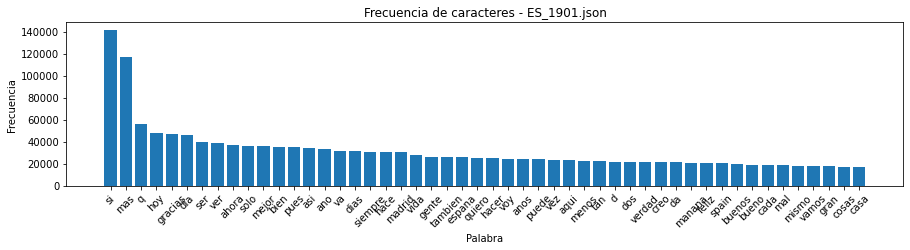



2.-  50 Palabras Conjuntas con mayor frecuencia 

{('buenos', 'dias'): 15022, ('tinton', 'tinton'): 8154, ('ver', 'si'): 7157, ('muchas', 'gracias'): 6890, ('nivel', 'amarillo'): 6857, ('acaba', 'publicar'): 6693, ('buenas', 'noches'): 6313, ('publicar', 'foto'): 6091, ('retencion', 'nivel'): 5682, ('madre', 'mia'): 5216, ('cada', 'vez'): 5029, ('ahora', 'tendencia'): 4860, ('puede', 'ser'): 4651, ('dindon', 'dindon'): 4092, ('feliz', 'ano'): 3918, ('madrid', 'spain'): 3558, ('talon', 'talon'): 3545, ('pon', 'pon'): 3459, ('reyes', 'magos'): 3419, ('autopista', 'autovia'): 3384, ('cada', 'dia'): 3322, ('amarillo', 'autopista'): 3283, ('ahora', 'mismo'): 3068, ('ano', 'nuevo'): 3003, ('pk', 'decreciente'): 2945, ('pues', 'si'): 2913, ('fin', 'semana'): 2893, ('dgt', 'retencion'): 2844, ('si', 'si'): 2834, ('va', 'ser'): 2813, ('hace', 'anos'): 2766, ('menos', 'mal'): 2604, ('nivel', 'rojo'): 2486, ('posicion', 'espana'): 2447, ('acaba', 'convertirse'): 2445, ('ocupando', 'posicion'): 

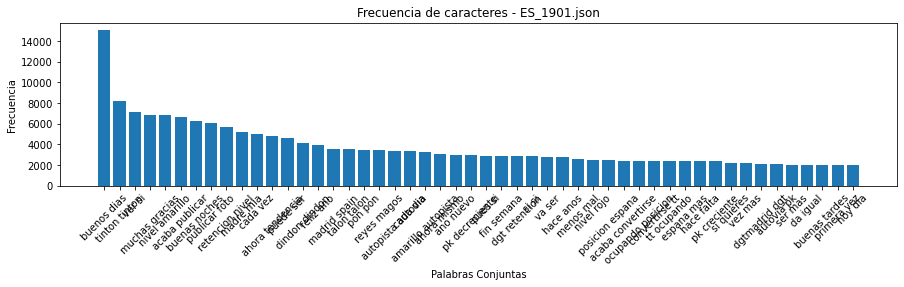



3.-  50 Palabras Conjuntas con el mayor Indice de asociación 

{('aachiissque', 'alergiavaya'): 23.476539429527605, ('aadioos', 'cooraazoon'): 23.476539429527605, ('aaggrr', 'favorenamorado'): 23.476539429527605, ('aahahahahahahaha', 'estoode'): 23.476539429527605, ('aahhquiero', 'gritarrq'): 23.476539429527605, ('aalien', 'fumetaa'): 23.476539429527605, ('aamericanos', 'expresaar'): 23.476539429527605, ('aamma', 'colegues'): 23.476539429527605, ('aandaluzajuvenilcdrincon', 'admalakacf'): 23.476539429527605, ('aantenitas', 'vinil'): 23.476539429527605, ('aata', 'tescolto'): 23.476539429527605, ('aaui', 'lrgullosa'): 23.476539429527605, ('aawwn', 'corajosoo'): 23.476539429527605, ('aayysi', 'dimitidono'): 23.476539429527605, ('abadesa', 'priora'): 23.476539429527605, ('abaigar', 'basokita'): 23.476539429527605, ('abajoantes', 'toesto'): 23.476539429527605, ('abalorio', 'pandor'): 23.476539429527605, ('abaloriosrebajas', 'martuchelaabalorios'): 23.476539429527605, ('abalosdimision', 's

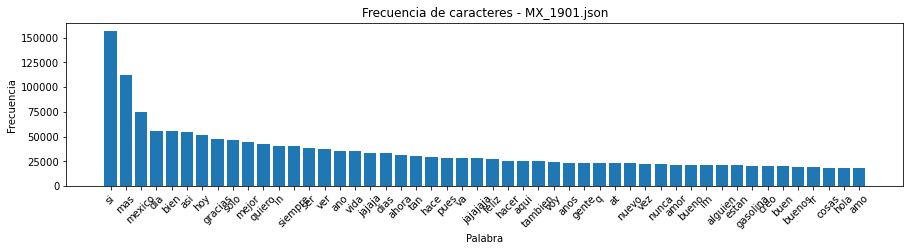



2.-  50 Palabras Conjuntas con mayor frecuencia 

{('im', 'at'): 20595, ('buenos', 'dias'): 14299, ('ciudad', 'mexico'): 8134, ('mexico', 'city'): 7413, ('acaba', 'publicar'): 7181, ('muchas', 'gracias'): 6847, ('buen', 'dia'): 6712, ('publicar', 'foto'): 6636, ('distrito', 'federal'): 6113, ('feliz', 'ano'): 5671, ('buenas', 'noches'): 5092, ('ano', 'nuevo'): 4808, ('city', 'mexico'): 4776, ('in', 'ciudad'): 4675, ('in', 'mexico'): 4024, ('ahora', 'si'): 3990, ('nuevo', 'leon'): 3604, ('fin', 'semana'): 3579, ('ahora', 'tendencia'): 3565, ('mexico', 'df'): 3147, ('muchas', 'felicidades'): 3105, ('feliz', 'cumpleanos'): 3085, ('hace', 'anos'): 3069, ('buenas', 'tardes'): 3003, ('at', 'in'): 2895, ('ja', 'ja'): 2865, ('pues', 'si'): 2822, ('ver', 'si'): 2792, ('cada', 'vez'): 2728, ('quiero', 'ir'): 2607, ('tal', 'vez'): 2594, ('federal', 'mexico'): 2544, ('dia', 'hoy'): 2543, ('puede', 'ser'): 2537, ('quintana', 'roo'): 2453, ('in', 'cuauhtemoc'): 2375, ('cada', 'dia'): 2337, ('prime

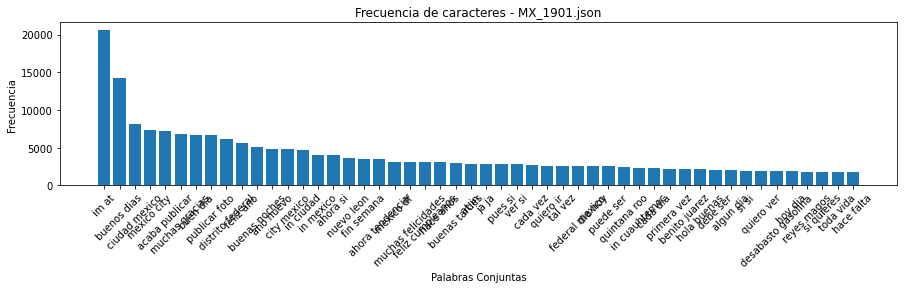



3.-  50 Palabras Conjuntas con el mayor Indice de asociación 

{('aachinga', 'peliculaidk'): 23.541932719345166, ('aacs', 'drmiamiwetv'): 23.541932719345166, ('aaeminfo', 'besayunos'): 23.541932719345166, ('aahaha', 'jajajajajajajatransformaciondecuartayonovoteporamlo'): 23.541932719345166, ('aahajajaja', 'diiasse'): 23.541932719345166, ('aahperro', 'mexicanpride'): 23.541932719345166, ('aajajjajajajajajajaj', 'buenohuevo'): 23.541932719345166, ('aak', 'bnarx'): 23.541932719345166, ('aammddig', 'oofic'): 23.541932719345166, ('aammdistrito', 'pueblasolemne'): 23.541932719345166, ('aamonoos', 'entontrar'): 23.541932719345166, ('aampd', 'telmexah'): 23.541932719345166, ('aandaa', 'pillinate'): 23.541932719345166, ('aanld', 'aduanerodecorazon'): 23.541932719345166, ('aannos', 'nonir'): 23.541932719345166, ('aantcesar', 'erandi'): 23.541932719345166, ('aape', 'microneedling'): 23.541932719345166, ('aarrazaa', 'wowtienes'): 23.541932719345166, ('aarreglado', 'matamorosmoroschannel'): 23.54

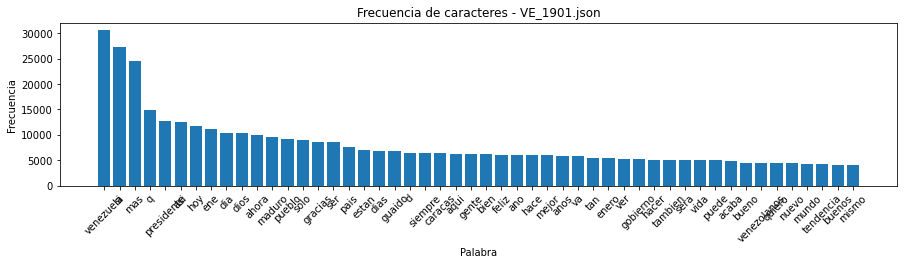



2.-  50 Palabras Conjuntas con mayor frecuencia 

{('buenos', 'dias'): 3225, ('ahora', 'tendencia'): 2940, ('acaba', 'publicar'): 2449, ('publicar', 'foto'): 2245, ('posicion', 'venezuela'): 1853, ('acaba', 'convertirse'): 1852, ('convertirse', 'tt'): 1852, ('tt', 'ocupando'): 1852, ('ocupando', 'posicion'): 1852, ('tendencia', 'venezuela'): 1517, ('venezuela', 'mas'): 1512, ('juan', 'guaido'): 1443, ('nicolas', 'maduro'): 1433, ('dios', 'bendiga'): 1341, ('feliz', 'ano'): 1168, ('asamblea', 'nacional'): 1120, ('tendencia', 'caracas'): 1055, ('debe', 'ser'): 1034, ('feliz', 'dia'): 1028, ('buen', 'dia'): 1020, ('venezuela', 'trndnl'): 1008, ('ja', 'ja'): 875, ('gracias', 'dios'): 867, ('pueblo', 'venezolano'): 823, ('buenas', 'noches'): 749, ('hace', 'anos'): 739, ('puede', 'ser'): 710, ('cada', 'vez'): 698, ('maracaibo', 'venezuela'): 681, ('cabildo', 'abierto'): 680, ('buenas', 'tardes'): 674, ('ano', 'nuevo'): 662, ('dios', 'mio'): 661, ('cada', 'dia'): 651, ('san', 'diego'): 637,

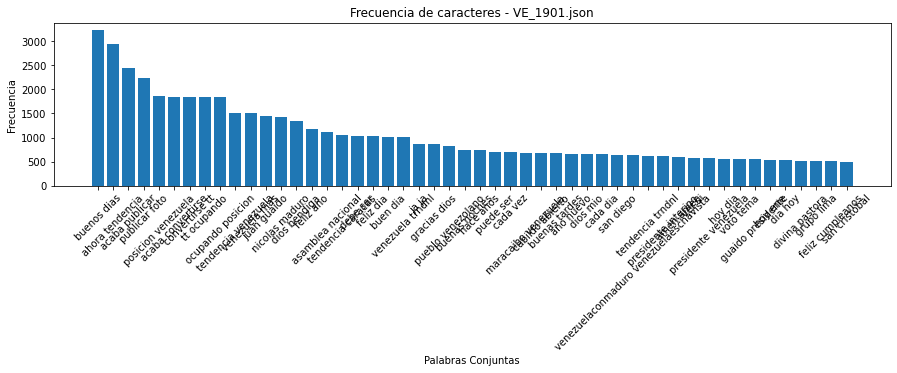



3.-  50 Palabras Conjuntas con el mayor Indice de asociación 

{('aacastillo', 'rbracho'): 21.457618846248913, ('aacompanarloen', 'cabilddo'): 21.457618846248913, ('aael', 'perritodile'): 21.457618846248913, ('aai', 'aera'): 21.457618846248913, ('aajajajajaajajajajajajajajajaja', 'cofcofcoftosjajaj'): 21.457618846248913, ('aajjaayo', 'bicicletasalimos'): 21.457618846248913, ('aamal', 'sahar'): 21.457618846248913, ('aandaa', 'maamaarr'): 21.457618846248913, ('aangel', 'demoniaco'): 21.457618846248913, ('aantonop', 'spoke'): 21.457618846248913, ('aapuesgeneracion', 'relevojaeso'): 21.457618846248913, ('aaquuii', 'paayaasiitoo'): 21.457618846248913, ('aauusiliioo', 'ajajajajajajjajajajajajajajajajajajajajakajakajakajjajajajajaakakakakkakakakakajanajajajajajajaj'): 21.457618846248913, ('aayycomo', 'doliotu'): 21.457618846248913, ('abace', 'despeine'): 21.457618846248913, ('abajodictadura', 'musician'): 21.457618846248913, ('abajofabulosa', 'proximalo'): 21.457618846248913, ('abajoladicta

In [3]:

for i in arrJsonFiles:
    print ("\n----> Archivo: ", i , "\n\n")
    
    print ("1.-  50 Palabras con mayor frecuencia\n")
    # create list x, y
    print (resultsAnalysisWordCommon[i])
    x = list (resultsAnalysisWordCommon[i].keys())
    y = list (resultsAnalysisWordCommon[i].values())
    #draw frequency
    %matplotlib inline 
    plt.figure(figsize=(15,3))    
    plt.bar(x,y) 
    plt.title('Frecuencia de caracteres - ' + i) 
    plt.ylabel('Frecuencia') 
    plt.xlabel('Palabra') 
    plt.xticks(rotation=45)    
    plt.show()    
    print ("\n")
    
    print ("2.-  50 Palabras Conjuntas con mayor frecuencia \n")
    print (resultsAnalysisWordAssociationCommon[i])   
    xList = list (resultsAnalysisWordAssociationCommon[i].keys())
    x=[]
    for elem in xList:
        xString = ' '.join([str(word) for word in elem])
        x.append(xString)    
    y = list (resultsAnalysisWordAssociationCommon[i].values())
    #draw frequency
    %matplotlib inline 
    plt.figure(figsize=(15,3))    
    plt.bar(x,y) 
    plt.title('Frecuencia de caracteres - ' + i) 
    plt.ylabel('Frecuencia') 
    plt.xlabel('Palabras Conjuntas') 
    plt.xticks(rotation=45)    
    plt.show()           
    print ("\n")
    
    print ("3.-  50 Palabras Conjuntas con el mayor Indice de asociación \n")
    print (resultsAnalysisRatioAssociation[i])
    print ("\n\n") 

## Interpretación

**Método de trabajo:**
+ Del corpus original:
+ Se eliminaron acentos.
+ Se normalizó a minúsculas.
+ Se eliminaron enlaces (http).
+ Se eliminaron nombres de usuarios (@).
+ Se eliminaron caracteres especiales y números
+ Se eliminaron stopwords (español).
+ Con las palabras resultantes se creó el corpus de trabajo para calcular P(x), P(x,y) e I(x,y). 

**Análisis del conteo de palabras comunes y pares de palabras comunes:**
+ En los 3 archivos, varias de las palabras más frecuentes forman parte del top de palabras asociadas.

**Análisis del Indice de Información Mutua:**
+ Las palabras asociadas con un mayor Indice de Información Mutua no se encuentran dentro del top de palabras conjuntas con mayor frecuencia.
+ Lo anterior se explica por la fórmula log2 ( P(x,y) / P(x)(Py) ), los pares de palabras con menor probabilidad aportan mayor información mutua.

**Hallazgos:**
Para tener un buen análisis de palabras asociadas es necesario:
+ Elimninar acentos, caracteres especiales, números y stopwords.
+ Eliminar palabras sin significado: enlaces (http), usuarios (@).
+ Normalizar a minúsculas.

Código <https://github.com/erlinares/mcdi2020/edit/master/01_proc_inf/ses_03_act1/>